**21-03-23 ML_DL 06_tensorflow ver2_딥러닝 (c)cherryuki (ji)**

# 06. tensorflow_ver2_keras
## 1. XOR Problem

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential #모델 객체 생성시
from tensorflow.keras.layers import Dense #layer 쌓을 때 필요한 함수
import matplotlib.pyplot as plt

In [3]:
#1. data set
x_data = [[0,0],[0,1],[1,0],[1,1]]
y_data = [[0],  [1],  [1],  [0]]

#2. 모델 구성
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(20, activation='relu')) #은닉층부터는 input_dim 기재X
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#입력2, 출력10: Weight 20(2*10)개, bias: 10개 -> 30(파라미터)
#입력10, 출력20: Weight 200(10*20)개, bias:20개 -> 220(파라미터)
print(model.summary()) #파라미터의 개수 출력

#3. 모델 학습과정
model.compile(loss='mse', optimizer='adam', metrics=['binary_accuracy'])
#model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy']) 
#model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy']) 
#loss: mse, binary_crossentropy, crossentropy

#4. 학습하기
fit_hist = model.fit(x_data, y_data, epochs=100, verbose=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1/1 - 0s - loss: 0.2497 - binary_accuracy: 0.5000
Epoch 2/100
1/1 - 0s - loss: 0.2483 - binary_accuracy: 0.2500
Epoch 3/100
1/1 - 0s - loss: 0.2468 - binary_accuracy: 0.2500
Epoch 4/100
1/1 - 0s - loss: 0.2454 - binary_accuracy: 0.2500
Epo

In [4]:
fit_hist.history.keys()

dict_keys(['loss', 'binary_accuracy'])

In [5]:
for acc in fit_hist.history['binary_accuracy']:
    print(acc, end='\t')

0.5	0.25	0.25	0.25	0.25	0.25	0.5	0.5	0.5	0.5	0.5	0.5	0.5	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	

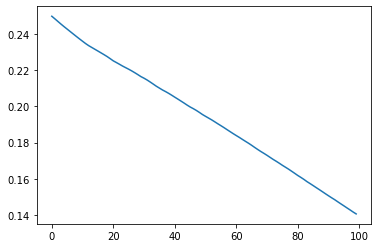

In [7]:
plt.plot(fit_hist.history['loss'])
plt.show()

In [8]:
#입력 스타일은 [[0, 0]]
while True:
    input_list = input('space로 분리해서 0이나 1을 2개 입력(종료:9)').strip().split() #space를 기준으로 분리
    input_data = list(map(int, input_list))
    print(input_data)
    if input_data[0] == 9:
        break;
    input_data = [input_data]
    #input_data = np.array(input_data).reshape(1,2)
    print("입력값:", input_data)
    print("예측값:", int(model.predict(input_data).round()))

space로 분리해서 0이나 1을 2개 입력(종료:9)0 0
[0, 0]
입력값: [[0, 0]]
예측값: 0
space로 분리해서 0이나 1을 2개 입력(종료:9)1 0
[1, 0]
입력값: [[1, 0]]
예측값: 1
space로 분리해서 0이나 1을 2개 입력(종료:9)0 1
[0, 1]
입력값: [[0, 1]]
예측값: 1
space로 분리해서 0이나 1을 2개 입력(종료:9)1 1
[1, 1]
입력값: [[1, 1]]
예측값: 0
space로 분리해서 0이나 1을 2개 입력(종료:9)9
[9]


## 2. AND Problem

In [9]:
#1. data set
x_data = [[0,0],[0,1],[1,0],[1,1]]
y_data = [[0],  [0],  [0],  [1]]

#2. 모델 구성
and_model = Sequential()
and_model.add(Dense(32, input_dim=2, activation='relu'))
and_model.add(Dense(1, activation='sigmoid'))

print(and_model.summary()) #파라미터의 개수 출력

#3. 모델 학습과정
and_model.compile(loss='mse', optimizer='adam', metrics=['binary_accuracy'])

#4. 학습하기
and_fit_hist = and_model.fit(x_data, y_data, epochs=300, verbose=0)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
and_fit_hist.history.keys()

dict_keys(['loss', 'binary_accuracy'])

In [12]:
for acc in and_fit_hist.history['binary_accuracy']:
    print(acc, end='\t')

0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.

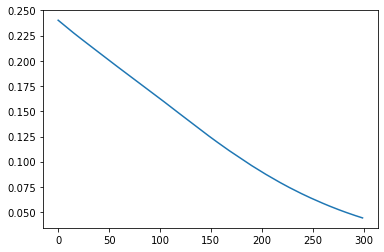

In [13]:
plt.plot(and_fit_hist.history['loss'])
plt.show()

In [14]:
#입력 스타일은 [[0, 0]]
while True:
    input_list = input('space로 분리해서 0이나 1을 2개 입력(종료:9)').strip().split() #space기준으로 분리
    input_data = list(map(int, input_list))
    print(input_data)
    if input_data[0] ==9:
        break;
    input_data = [input_data]
    #input_data = np.array(input_data).reshape(1,2)
    print('입력값:', input_data)
    print('예측값:', int(and_model.predict(input_data).round()))

space로 분리해서 0이나 1을 2개 입력(종료:9)0 0
[0, 0]
입력값: [[0, 0]]
예측값: 0
space로 분리해서 0이나 1을 2개 입력(종료:9)0 1
[0, 1]
입력값: [[0, 1]]
예측값: 0
space로 분리해서 0이나 1을 2개 입력(종료:9)1 1
[1, 1]
입력값: [[1, 1]]
예측값: 1
space로 분리해서 0이나 1을 2개 입력(종료:9)9
[9]


## 3. OR Problem

In [22]:
#1. data set
x_data = [[0,0],[0,1],[1,0],[1,1]]
y_data = [[0],  [1],  [1],  [1]]

#2. 모델 구성
or_model = Sequential()
or_model.add(Dense(32, input_dim=2, activation='relu'))
or_model.add(Dense(1, activation='sigmoid'))
print(or_model.summary())

#3. 학습과정
or_model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

#4. 학습하기
or_fit_hist = or_model.fit(x_data, y_data, epochs=300, verbose=0)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
for acc in or_fit_hist.history['accuracy']:
    print(acc, end='\t')

1.0	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0

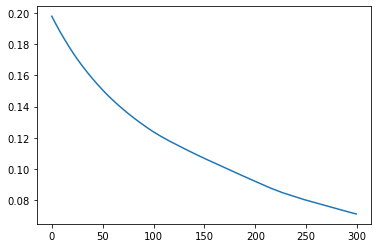

In [24]:
plt.plot(or_fit_hist.history['loss'])
plt.show()

In [25]:
while True:
    input_list = input('space로 분리해서 0이나 1을 2개 입력(종료:9)').strip().split() #space기준으로 분리
    input_data = list(map(int, input_list))
    print(input_data)
    if input_data[0] ==9:
        break;
    input_data = [input_data]
    #input_data = np.array(input_data).reshape(1,2)
    print('입력값:', input_data)
    print('예측값:', int(or_model.predict(input_data).round()))

space로 분리해서 0이나 1을 2개 입력(종료:9)0 0
[0, 0]
입력값: [[0, 0]]
예측값: 0
space로 분리해서 0이나 1을 2개 입력(종료:9)1 0
[1, 0]
입력값: [[1, 0]]
예측값: 1
space로 분리해서 0이나 1을 2개 입력(종료:9)1 1
[1, 1]
입력값: [[1, 1]]
예측값: 1
space로 분리해서 0이나 1을 2개 입력(종료:9)9
[9]
